In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
import argparse

# Parser
my_folder = "Parameter_Analysis_Incast_32_128_100G"

# Creating the original DataFrame with the specified columns and adding the rows
df = pd.read_csv(my_folder + "/Summary.csv")
display(df)

,Algo,KMin,KMax,TargetRTT,FastDrop,FastIncrease,DoJitter,DoExpGain,DelayGain,CompletionTime(us),MinFCT(us),MaxFCT(us),MinvsMaxFCT%,NumTrimmed,Score (Equally Importance to Fairness and RunTime),FullName
0,UEC BTS,20,80,0,0,0,0,0,0.0,357,217,357,64.325267,0,67.837367,uecCompositeBTS.tmp
1,UEC Version D,50,80,50,0,1,0,1,0.0,359,228,359,57.392949,1706,71.024974,UEC_incast_128_32_128.bin_Versionstandard_trim...
2,UEC Version D,50,80,50,0,0,0,1,0.0,359,228,359,57.392949,1706,71.024974,UEC_incast_128_32_128.bin_Versionstandard_trim...
3,UEC Version A,20,80,20,1,0,0,1,0.0,361,237,361,52.368450,1674,73.261758,UEC_incast_128_32_128.bin_VersiondelayA_KMin20...
4,UEC Version D,50,80,50,0,1,0,0,0.0,361,228,361,58.497580,1706,70.197194,UEC_incast_128_32_128.bin_Versionstandard_trim...
5,UEC Version A,20,80,20,1,1,0,1,0.0,361,237,361,52.368450,1674,73.261758,UEC_incast_128_32_128.bin_VersiondelayA_KMin20...
6,UEC Version D,50,80,50,0,0,0,0,0.0,361,228,361,58.497580,1706,70.197194,UEC_incast_128_32_128.bin_Versionstandard_trim...
7,NDP,0,0,0,0,0,0,0,0.0,362,334,362,8.366174,1800,95.126305,ndp.tmp
8,UEC Version D,50,80,50,1,1,0,1,0.0,362,278,362,30.259268,1701,84.179759,UEC_incast_128_32_128.bin_Versionstandard_trim...
9,UEC Version D,50,80,50,1,0,0,1,0.0,362,278,362,30.259268,1701,84.179759,UEC_incast_128_32_128.bin_Versionstandard_trim...


In [24]:
def run_comparison(df, filtering_on, possible_value_1, possible_value_2, possible_value_3 = None):
    # Columns
    all_options = ["Algo", "KMin", "FastDrop", "FastIncrease", "DoJitter",  "DoExpGain", "DelayGain"]
    all_options.remove(filtering_on)

    # Add Better Legend and Improve Naming for readability
    df["X_Label"] = df[all_options].astype(str).agg(' '.join, axis=1)
    if (filtering_on == "KMin"):
        df["FastIncrease"] = "FI:" + df["FastIncrease"].astype(str)
        df["DoJitter"] = "J:" + df["DoJitter"].astype(str)
        df["DoExpGain"] = "E:" + df["DoExpGain"].astype(str)
        df["DelayGain"] = "D:" + df["DelayGain"].astype(str)
        df["FastDrop"] = "FD:" + df["FastDrop"].astype(str)
    elif (filtering_on == "FastIncrease"):
        df["KMin"] = "K:" + df["KMin"].astype(str)
        df["DoJitter"] = "J:" + df["DoJitter"].astype(str)
        df["DoExpGain"] = "E:" + df["DoExpGain"].astype(str)
        df["DelayGain"] = "D:" + df["DelayGain"].astype(str)
        df["FastDrop"] = "FD:" + df["FastDrop"].astype(str)
    elif (filtering_on == "DoJitter"):
        df["KMin"] = "K:" + df["KMin"].astype(str)
        df["FastIncrease"] = "FI:" + df["FastIncrease"].astype(str)
        df["DoExpGain"] = "E:" + df["DoExpGain"].astype(str)
        df["DelayGain"] = "D:" + df["DelayGain"].astype(str)
        df["FastDrop"] = "FD:" + df["FastDrop"].astype(str)
    elif (filtering_on == "DoExpGain"):
        df["KMin"] = "K:" + df["KMin"].astype(str)
        df["FastIncrease"] = "FI:" + df["FastIncrease"].astype(str)
        df["DoJitter"] = "J:" + df["DoJitter"].astype(str)
        df["DelayGain"] = "D:" + df["DelayGain"].astype(str)
        df["FastDrop"] = "FD:" + df["FastDrop"].astype(str)
    elif (filtering_on == "DelayGain"):
        df["KMin"] = "K:" + df["KMin"].astype(str)
        df["FastIncrease"] = "FI:" + df["FastIncrease"].astype(str)
        df["DoJitter"] = "J:" + df["DoJitter"].astype(str)
        df["DoExpGain"] = "E:" + df["DoExpGain"].astype(str)
        df["FastDrop"] = "FD:" + df["FastDrop"].astype(str)
    elif (filtering_on == "FastDrop"):
        df["KMin"] = "K:" + df["KMin"].astype(str)
        df["FastIncrease"] = "FI:" + df["FastIncrease"].astype(str)
        df["DoJitter"] = "J:" + df["DoJitter"].astype(str)
        df["DoExpGain"] = "E:" + df["DoExpGain"].astype(str)
        df["DelayGain"] = "D:" + df["DelayGain"].astype(str)
    elif (filtering_on == "Algo"):
        df["KMin"] = "K:" + df["KMin"].astype(str)
        df["FastIncrease"] = "FI:" + df["FastIncrease"].astype(str)
        df["DoJitter"] = "J:" + df["DoJitter"].astype(str)
        df["DoExpGain"] = "E:" + df["DoExpGain"].astype(str)
        df["DelayGain"] = "D:" + df["DelayGain"].astype(str)
        df["FastDrop"] = "FD:" + df["FastDrop"].astype(str)
        
    df["Algo"] = df["Algo"].replace("UEC Version A", "VersA")
    df["Algo"] = df["Algo"].replace("UEC Version D", "VersD")
    lowest_completion_time = df["CompletionTime(us)"].min()
    max_completion_time = df["CompletionTime(us)"].max()

    # Sort the DataFrame by "CompletionTime(us)"
    df.sort_values(by="CompletionTime(us)", inplace=True)

    # Remove Other Algos
    removed_row = df[df["Algo"] == "NDP"].iloc[0]
    completion_time_ndp = removed_row["CompletionTime(us)"]

    removed_row = df[df["Algo"] == "UEC BTS"].iloc[0]
    completion_time_bts = removed_row["CompletionTime(us)"]

    removed_row = df[df["Algo"] == "STrack"].iloc[0]
    completion_time_strack = removed_row["CompletionTime(us)"]

    df = df[df["Algo"] != "NDP"]
    df = df[df["Algo"] != "UEC BTS"]
    df = df[df["Algo"] != "STrack"]

    # Create a string combination of the other columns for x-axis
    df["X_Label"] = df[all_options].astype(str).agg(' '.join, axis=1)

    # Creating the bar plot manually, alternating colors for FastDrop==0 and FastDrop==1
    fig, ax = plt.subplots()

    # Get the unique values of X_Label
    x_labels_unique = df["X_Label"].unique()

    # Calculate the number of bars for each group (FastDrop=0 and FastDrop=1)
    num_bars_per_group = df[filtering_on].nunique()

    df.sort_values(by="X_Label", inplace=True)
    # Calculate the total width of each group of bars
    group_width = 0.8

    # Calculate the spacing between each pair of bars
    spacing = 0.1

    # Calculate the width of each bar within a group
    bar_width = (group_width - spacing) / num_bars_per_group

    plt.axhline(y=completion_time_ndp, color="red", linestyle="--", label="NDP")
    plt.axhline(y=completion_time_bts, color="black", linestyle="--", label="BTS")
    plt.axhline(y=completion_time_strack, color="green", linestyle="--", label="STrack")

    if (possible_value_3 is None):
        # Plot the bars for FastDrop == 0
        for idx, x_label in enumerate(x_labels_unique):
            df_subset = df[(df["X_Label"] == x_label) & (df[filtering_on] == possible_value_1)]
            ax.bar([pos + idx * (group_width + spacing) for pos in range(len(df_subset))], df_subset["CompletionTime(us)"], width=bar_width, color="blue", label="{} == {}".format(filtering_on, possible_value_1) if idx == 0 else "")
        # Plot the bars for FastDrop == 1 with a small offset
        for idx, x_label in enumerate(x_labels_unique):
            df_subset = df[(df["X_Label"] == x_label) & (df[filtering_on] == possible_value_2)]
            ax.bar([pos + idx * (group_width + spacing) + bar_width for pos in range(len(df_subset))], df_subset["CompletionTime(us)"], width=bar_width, color="orange", label="{} == {}".format(filtering_on, possible_value_2) if idx == 0 else "")
    else:
        # Plot the bars for FastDrop == 0
        for idx, x_label in enumerate(x_labels_unique):
            df_subset = df[(df["X_Label"] == x_label) & (df[filtering_on] == possible_value_1)]
            ax.bar([pos + idx * (group_width + spacing) for pos in range(len(df_subset))], df_subset["CompletionTime(us)"], width=bar_width, color="blue", label="{} == {}".format(filtering_on, possible_value_1) if idx == 0 else "")
        # Plot the bars for FastDrop == 1 with a small offset
        for idx, x_label in enumerate(x_labels_unique):
            df_subset = df[(df["X_Label"] == x_label) & (df[filtering_on] == possible_value_2)]
            ax.bar([pos + idx * (group_width + spacing) + bar_width for pos in range(len(df_subset))], df_subset["CompletionTime(us)"], width=bar_width, color="orange", label="{} == {}".format(filtering_on, possible_value_2) if idx == 0 else "")
        # Plot the bars for FastDrop == 1 with a small offset
        for idx, x_label in enumerate(x_labels_unique):
            df_subset = df[(df["X_Label"] == x_label) & (df[filtering_on] == possible_value_3)]
            ax.bar([pos + idx * (group_width + spacing) + (bar_width * 2) for pos in range(len(df_subset))], df_subset["CompletionTime(us)"], width=bar_width, color="grey", label="{} == {}".format(filtering_on, possible_value_3) if idx == 0 else "")
        
    


    plt.ylim(lowest_completion_time - (lowest_completion_time * 0.05), max_completion_time + (max_completion_time * 0.05))
    plt.xlabel("Configuration (K = KMIn, FD = FastDrop, FI = FastIncrease, J = DoJitter, E = DoExpGain, D = DelayGainValue, FD = FastDrop)")
    plt.ylabel("Completion Time(us)")
    plt.title("Completion Time (us) comparing Feature: {} at {}".format(filtering_on, my_folder))

    # Set the x-axis tick positions and labels
    my_pos = []
    for idx, x_label in enumerate(x_labels_unique):
        my_pos.append([pos + idx * (group_width + spacing) + bar_width for pos in range(len(df_subset))][0] - (bar_width / 2))
    ax.set_xticks(my_pos)
    ax.set_xticklabels(x_labels_unique, rotation=90, ha='center')

    # Show the legend
    rcParams['figure.figsize'] = 25,10
    ax.legend()

    plt.tight_layout()
    plt.show()


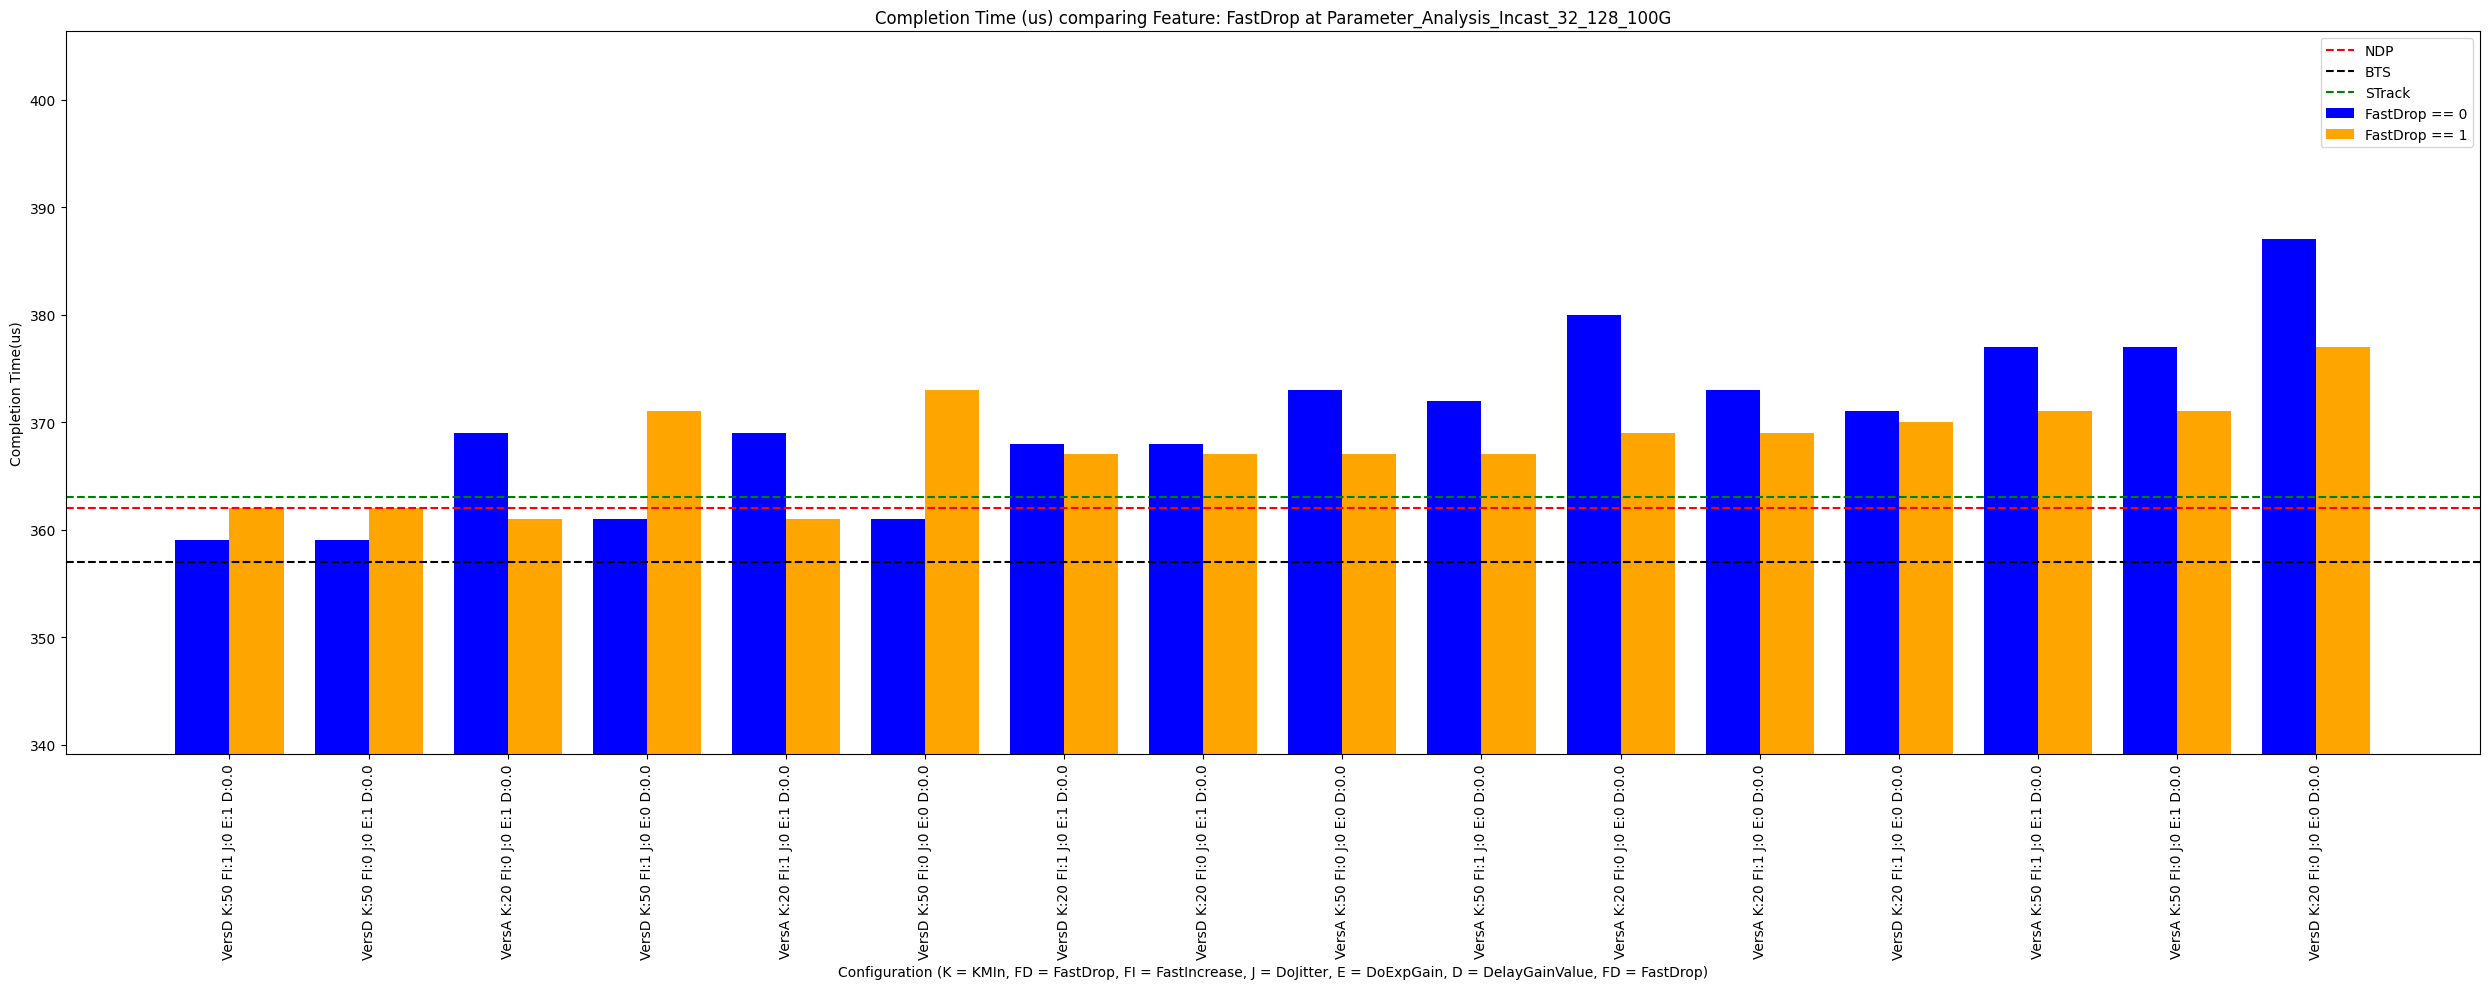

In [25]:
# Input Values
df = pd.read_csv(my_folder + "/Summary.csv")
filtering_on = "FastDrop"
possible_value_0 = 0
possible_value_1 = 1

# Generate Plot
run_comparison(df, filtering_on, possible_value_0, possible_value_1)

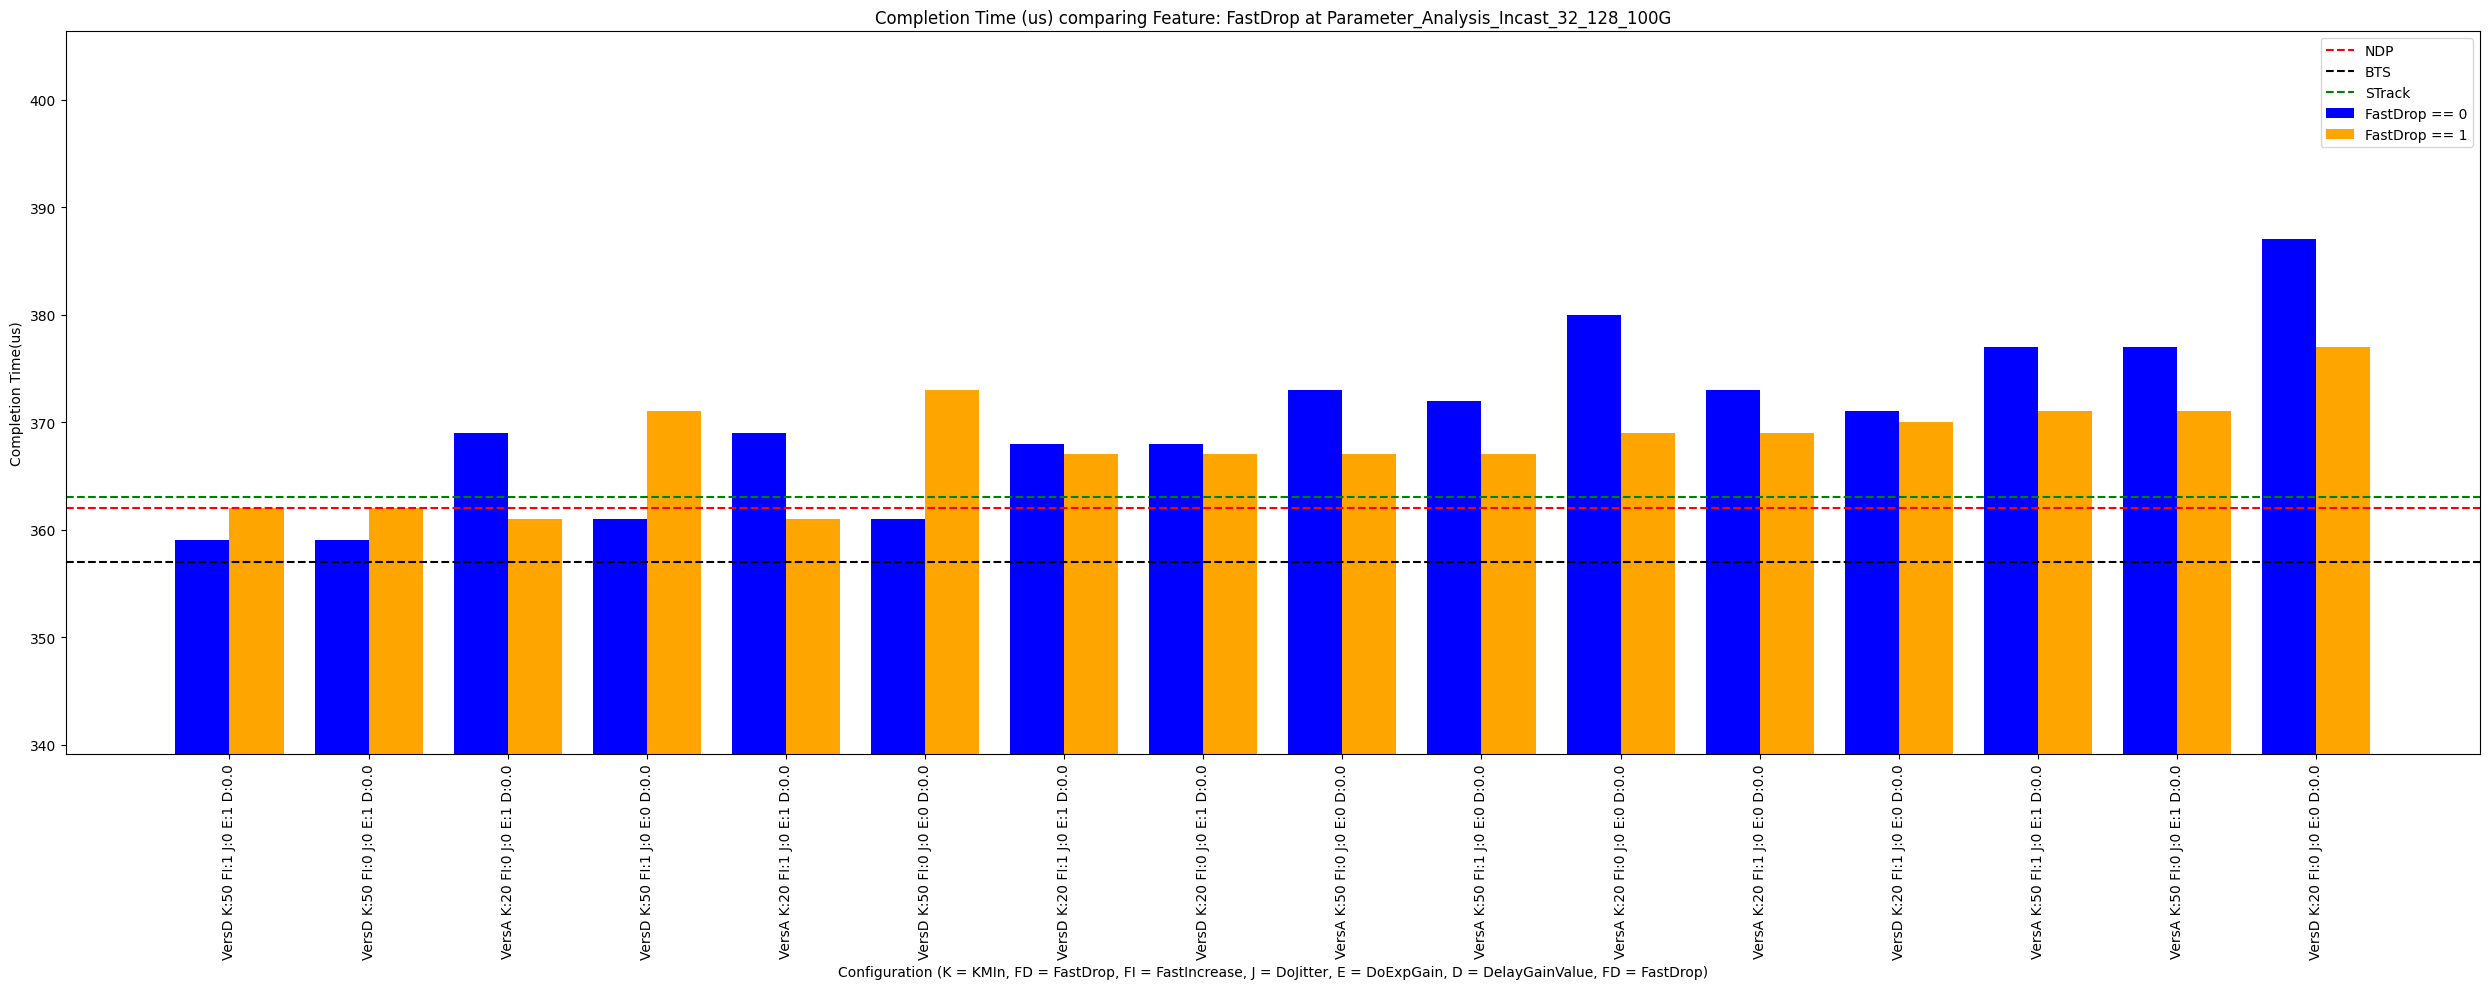

In [26]:
# Input Values
df = pd.read_csv(my_folder + "/Summary.csv")
filtering_on = "FastDrop"
possible_value_0 = 0
possible_value_1 = 1

# Generate Plot
run_comparison(df, filtering_on, possible_value_0, possible_value_1)

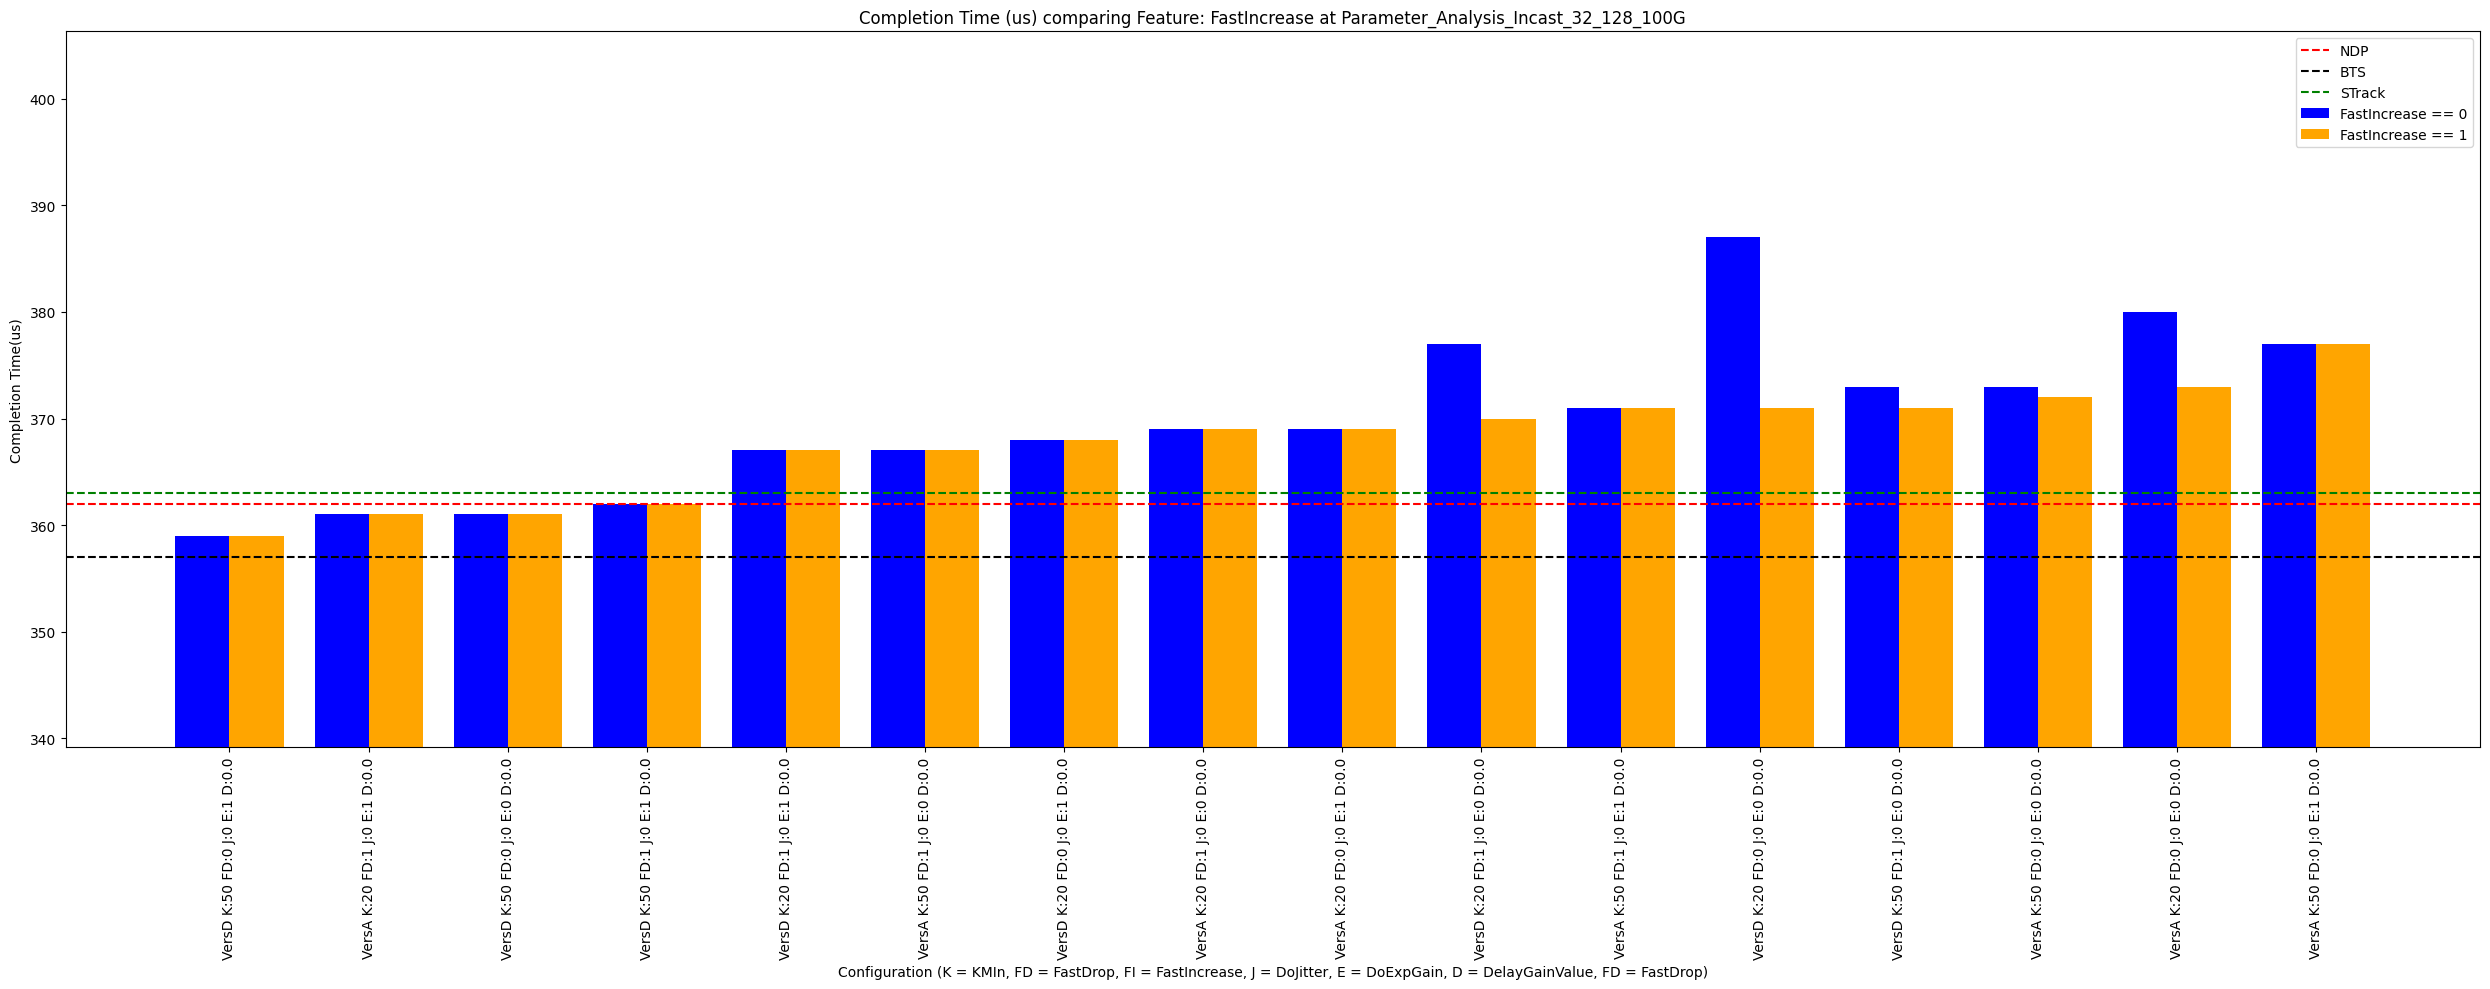

In [27]:
# Input Values
df = pd.read_csv(my_folder + "/Summary.csv")
filtering_on = "FastIncrease"
possible_value_0 = 0
possible_value_1 = 1

# Generate Plot
run_comparison(df, filtering_on, possible_value_0, possible_value_1)

IndexError: list index out of range

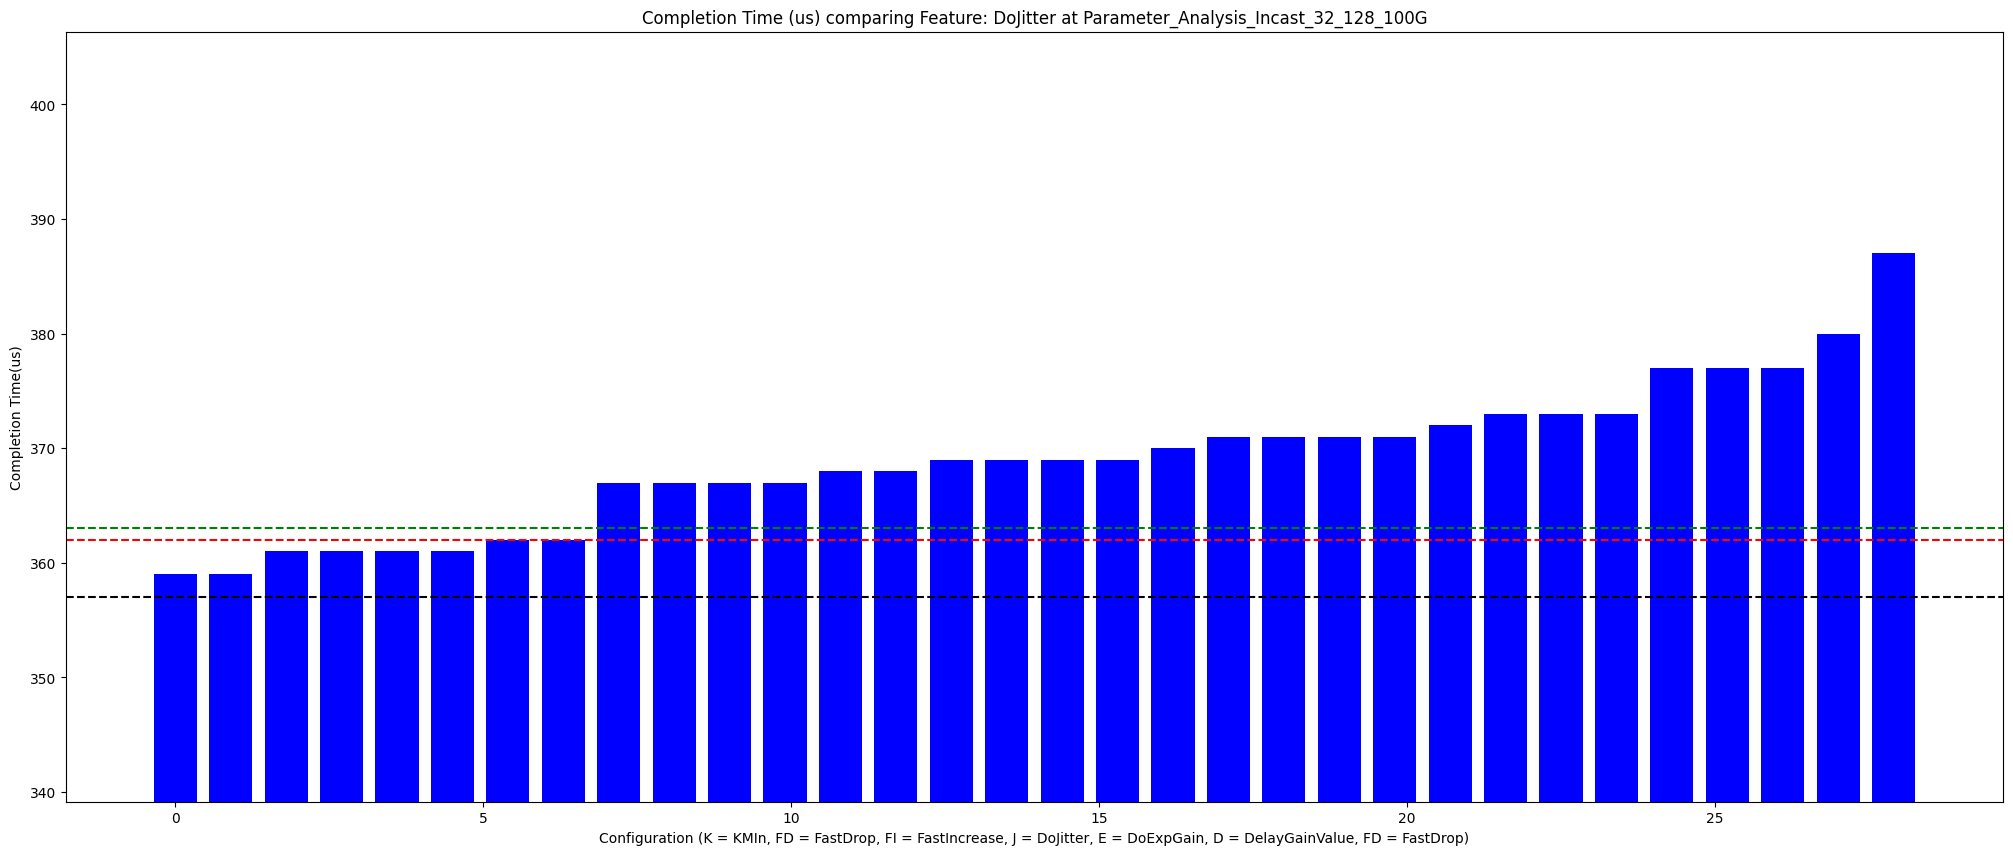

In [28]:
# Input Values
df = pd.read_csv(my_folder + "/Summary.csv")
filtering_on = "DoJitter"
possible_value_0 = 0
possible_value_1 = 1

# Generate Plot
run_comparison(df, filtering_on, possible_value_0, possible_value_1)

In [ ]:
# Input Values
df = pd.read_csv(my_folder + "/Summary.csv")
filtering_on = "DoExpGain"
possible_value_0 = 0
possible_value_1 = 1

# Generate Plot
run_comparison(df, filtering_on, possible_value_0, possible_value_1)

In [ ]:
# Input Values
df = pd.read_csv(my_folder + "/Summary.csv")
filtering_on = "Algo"
possible_value_0 = "VersA"
possible_value_1 = "VersD"

# Generate Plot
run_comparison(df, filtering_on, possible_value_0, possible_value_1)

In [ ]:
# Input Values
df = pd.read_csv(my_folder + "/Summary.csv")
filtering_on = "DelayGain"
possible_value_0 = 0
possible_value_1 = 2
possible_value_2 = 5

# Generate Plot
run_comparison(df, filtering_on, possible_value_0, possible_value_1, possible_value_2)